In [548]:
import matplotlib.image as mgimage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import cv2
import pandas as pd

(1000, 1000)

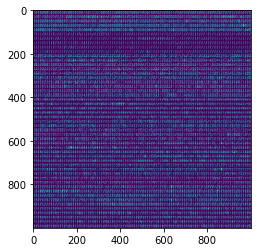

In [572]:
#Load ảnh, có tổng cộng 100 số/hàng, 
# 1 số có 5 dòng, Số từ 0-9 --> có  500 dòng.
# Kích thước ma trận của ảnh là 1000,1000 -> Tức là 1 số hiển thị ở đây sẽ chiếm kích thước là 20*10
img = cv2.imread('digits.png',0)
plt.imshow(img)
img.shape

In [333]:
# Chia đôi ảnh ra theo chiều dọc, Cells là tập để train , Test_cells là tập để test

cells = [np.vsplit(data,50) for data in np.hsplit(np.hsplit(img,2)[0],50)]

test_cells = [np.vsplit(data,50) for data in np.hsplit(np.hsplit(img,2)[1],50)]

#Chuyển từ list về array
x = np.array(cells)
test_x = np.array(test_cells)

#Chuyển về mảng 1 chiều để tính toán cho dễ

train = x[:,:50].reshape(-1,200).astype(np.float32)
test = test_x[:,:50].reshape(-1,200).astype(np.float32)

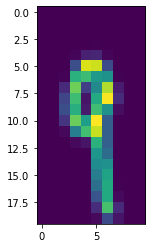

In [283]:
plt.imshow(cells[22][49])

In [513]:
# Tạo nhãn cho tập train và test (do chia đôi và thứ tự sắp xếp bằng nhau nên có thể dùng chung)
label = np.repeat([0,1,2,3,4,5,6,7,8,9],5)
for i in range(49):
    b = np.repeat([0,1,2,3,4,5,6,7,8,9],5)
    label = np.concatenate((label,b),axis=0)


In [596]:
# Dùng KNN để train, có dán nhãn dữ liệu cho tập train.
knn = cv2.ml.KNearest_create()
knn.train(train,0,label)

#temp mặc định, kết quả , #hàng xóm, #Khoảng cách
temp,ketqua,neighbour,distance = knn.findNearest(test,4)   #Lựa chọn 4 nhãn gần nhất để predict
print(ketqua)

[[0.]
 [8.]
 [0.]
 ...
 [9.]
 [9.]
 [9.]]


In [597]:
#Function để đưa về DataFrame check kết quả
def condition(s):
    if s['label'] == s['predict']:
        return 1
    else:
        return 0

In [598]:
#Kết quả đạt được. 1 là đúng, 0 là sai. Số lượng predict là 2500
so_sanh = pd.DataFrame()
so_sanh['label'] = label
so_sanh['predict'] = ketqua
so_sanh['check'] = so_sanh.apply(condition,axis=1)

print("Tỷ lệ chính xác: \n"+ str(so_sanh.check.value_counts(normalize=True)))


print("\n\nSố dự đoán chính xác: \n"+ str(so_sanh.check.value_counts()))

Tỷ lệ chính xác: 
1    0.9308
0    0.0692
Name: check, dtype: float64


Số dự đoán chính xác: 
1    2327
0     173
Name: check, dtype: int64


(20, 10)

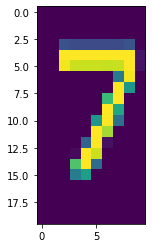

In [589]:
anhtest = cv2.imread('7.jpg',0)
plt.imshow(anhtest)
anhtest.shape

In [614]:
temp,ketqua,neighbour,distance = knn.findNearest(anhtest.reshape(-1,200).astype(np.float32),4)   #Lựa chọn 4 nhãn gần nhất để predict
print(ketqua)
print('neighbours are: ' + str(neighbour))
print('distances are: ' + str(distance))
#Kết quả dự đoán hơi sai. Đoạn này mà đánh trọng số cho điểm gần nhất thì KQ sẽ đúng

[[2.]]
neighbours are: [[7. 7. 2. 2.]]
distances are: [[785638. 828387. 886341. 946488.]]
